In [1]:
import numpy as np
import mat73
import skimage.io as skio
import os
import matplotlib.pyplot as plt
# import cv2
from skimage.util import img_as_uint, img_as_ubyte
from skimage import exposure, transform, filters
import sys
sys.path.append("../SpikeCounter")
from spikecounter.ui import visualize, HyperStackViewer
from spikecounter import utils

In [ ]:
import win32api

drives = win32api.GetLogicalDriveStrings()
drives = drives.split('\000')[:-1]
print(drives)

In [2]:
rootdir = os.path.join("F:/", "Bill Jia", "Optopatch", "20220413")

In [3]:
filename = "0759562p_cal_fov"

In [4]:
matdata = mat73.loadmat(os.path.join(rootdir, filename, "output_data_py.mat"))['dd_compat_py']

In [5]:
confocal = matdata['confocal']

In [9]:
confocal

{'PMT': array([[0.13666735, 0.11573918, 0.01882567, ..., 0.00723468, 0.00337102,
         0.04619327],
        [0.14085298, 0.14439467, 0.01109834, ..., 0.00304905, 0.00337102,
         0.06390172],
        [0.11960284, 0.17208424, 0.00691271, ..., 0.00176116, 0.00079525,
         0.07517073],
        ...,
        [0.01238623, 0.05424257, 0.03621215, ..., 0.19623213, 0.12507636,
         0.12507636],
        [0.00659074, 0.06036003, 0.06518961, ..., 0.26094846, 0.13215974,
         0.1131634 ],
        [0.01303018, 0.04683721, 0.0754927 , ..., 0.29411156, 0.12829608,
         0.11348538]]),
 'galvofbx': array([[-0.77097129, -0.7719372 , -0.77161523, ..., -0.77258115,
         -0.77225917, -0.7719372 ],
        [-0.76227804, -0.76324396, -0.76420987, ..., -0.76453185,
         -0.76453185, -0.76453185],
        [-0.7616341 , -0.76260001, -0.76517579, ..., -0.76646368,
         -0.76581973, -0.76420987],
        ...,
        [-0.73136874, -0.73104676, -0.73104676, ..., -0.72686113,
     

In [12]:
confocal['xdata'][:400]

array([-5.   , -4.975, -4.95 , -4.925, -4.9  , -4.875, -4.85 , -4.825,
       -4.8  , -4.775, -4.75 , -4.725, -4.7  , -4.675, -4.65 , -4.625,
       -4.6  , -4.575, -4.55 , -4.525, -4.5  , -4.475, -4.45 , -4.425,
       -4.4  , -4.375, -4.35 , -4.325, -4.3  , -4.275, -4.25 , -4.225,
       -4.2  , -4.175, -4.15 , -4.125, -4.1  , -4.075, -4.05 , -4.025,
       -4.   , -3.975, -3.95 , -3.925, -3.9  , -3.875, -3.85 , -3.825,
       -3.8  , -3.775, -3.75 , -3.725, -3.7  , -3.675, -3.65 , -3.625,
       -3.6  , -3.575, -3.55 , -3.525, -3.5  , -3.475, -3.45 , -3.425,
       -3.4  , -3.375, -3.35 , -3.325, -3.3  , -3.275, -3.25 , -3.225,
       -3.2  , -3.175, -3.15 , -3.125, -3.1  , -3.075, -3.05 , -3.025,
       -3.   , -2.975, -2.95 , -2.925, -2.9  , -2.875, -2.85 , -2.825,
       -2.8  , -2.775, -2.75 , -2.725, -2.7  , -2.675, -2.65 , -2.625,
       -2.6  , -2.575, -2.55 , -2.525, -2.5  , -2.475, -2.45 , -2.425,
       -2.4  , -2.375, -2.35 , -2.325, -2.3  , -2.275, -2.25 , -2.225,
      

In [8]:
reshaped_img = confocal['PMT'].T.reshape((confocal['PMT'].shape[1], int(confocal["numlines"]), \
                                          2,int(confocal["points_per_line"])))
# reshaped_img = confocal['PMT'].T.reshape((confocal["PMT"].shape[1], int(confocal["numlines"]), \
#                                           2,int(confocal["points_per_line"])))
fwd_scan = reshaped_img[:,:,0,:]
rev_scan = reshaped_img[:,:,1,:]
print(fwd_scan.shape)

ValueError: cannot reshape array of size 2876800 into shape (10,400,2,400)

In [71]:
reshaped_xdata = confocal['xdata'].reshape(int(confocal["numlines"]), 2,\
                                           int(confocal["points_per_line"]))

In [72]:
pixel_step = reshaped_xdata[0,0,1] - reshaped_xdata[0,0,0]

In [74]:
# offset = np.min(np.mean(confocal["galvofbx"][:int(confocal["points_per_line"]),:],axis=1))
offset = np.min(np.mean(confocal["galvofbx"][:int(confocal["points_per_line"])]))

In [75]:
offset_pix = offset/pixel_step

In [76]:
offset_idx = int(np.round(-(offset_pix+2)))
revscan_shift = np.roll(np.flip(rev_scan, axis=2), offset_idx, axis=2)
revscan_shift[:,:,:offset_idx] = np.mean(revscan_shift, axis=(1,2))[:,np.newaxis,np.newaxis]

In [87]:
mean_img = (fwd_scan + revscan_shift)/2

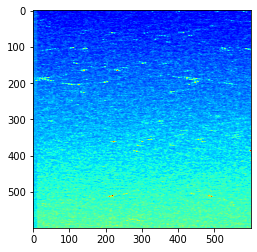

In [89]:
plt.imshow(mean_img[0], cmap="jet", vmin=np.percentile(fwd_scan[0], 0), vmax=np.percentile(fwd_scan[0],99.9))

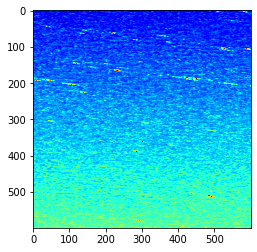

In [86]:
plt.imshow(fwd_scan[0], cmap="jet", vmin=np.percentile(fwd_scan[0], 0), vmax=np.percentile(fwd_scan[0],99.9))

In [100]:
utils.display_zstack(fwd_scan)

interactive(children=(IntSlider(value=19, description='z', max=39), Dropdown(description='c', options=('all', …

In [47]:
utils.display_zstack(rev_scan)

interactive(children=(IntSlider(value=14, description='z', max=29), Dropdown(description='c', options=('all', …

In [41]:
oneP_img = img_as_ubyte(exposure.rescale_intensity(skio.imread(os.path.join(rootdir, "Snaps", "1833531p_regist_3.tiff"))))

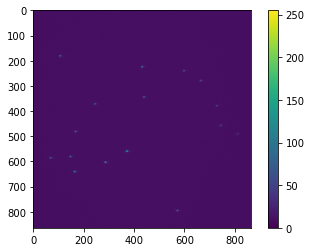

In [99]:
%matplotlib inline
offset = (2048 - 864)//2
q = plt.imshow(oneP_img[offset:-offset,offset:-offset])
plt.colorbar(q)

(200, 200)
[0 1 2]


<IPython.core.display.Javascript object>


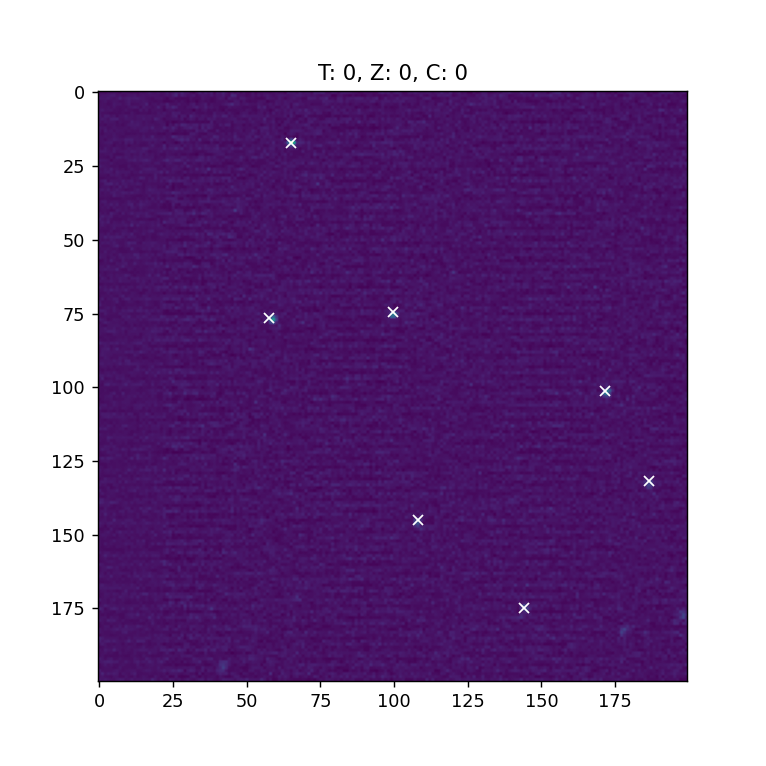

In [76]:
%matplotlib notebook
h = HyperStackViewer(twoP_img, width=6, height=6)
h.select_points_clicky(7)

In [77]:
twoP_points = np.array(h.points)

(1024, 1024)
[0 1 2]


<IPython.core.display.Javascript object>


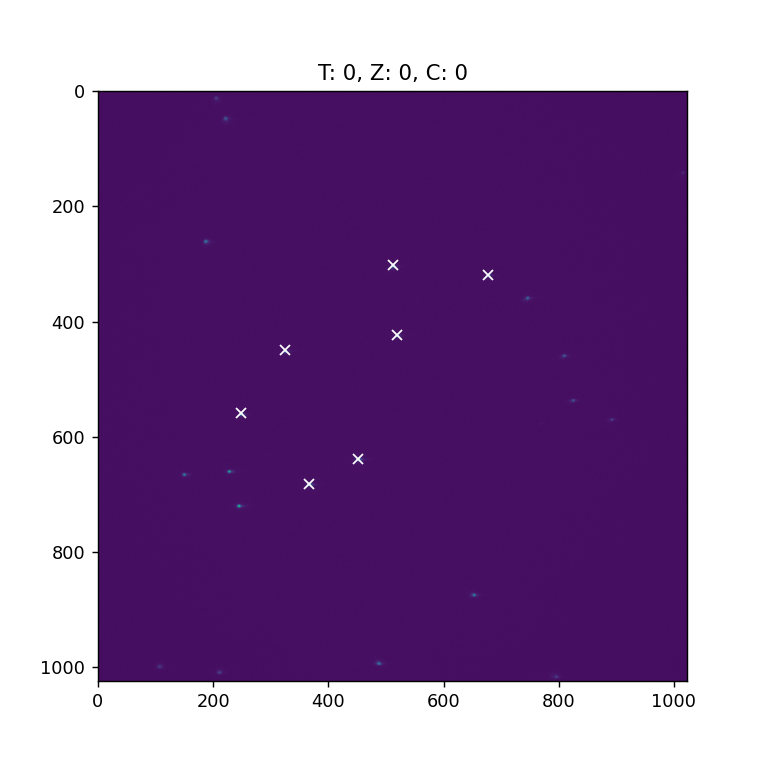

In [78]:
h = HyperStackViewer(oneP_img[512:-512,512:-512], width=6, height=6)
h.select_points_clicky(7)

In [89]:
oneP_points = np.array(h.points) + np.array([512,512])

In [91]:
h, mask = cv2.findHomography(np.array(twoP_points), oneP_points, cv2.RANSAC)

In [93]:
height, width = oneP_img.shape

In [94]:
im1Reg = cv2.warpPerspective(twoP_img, h, (width, height))

<IPython.core.display.Javascript object>


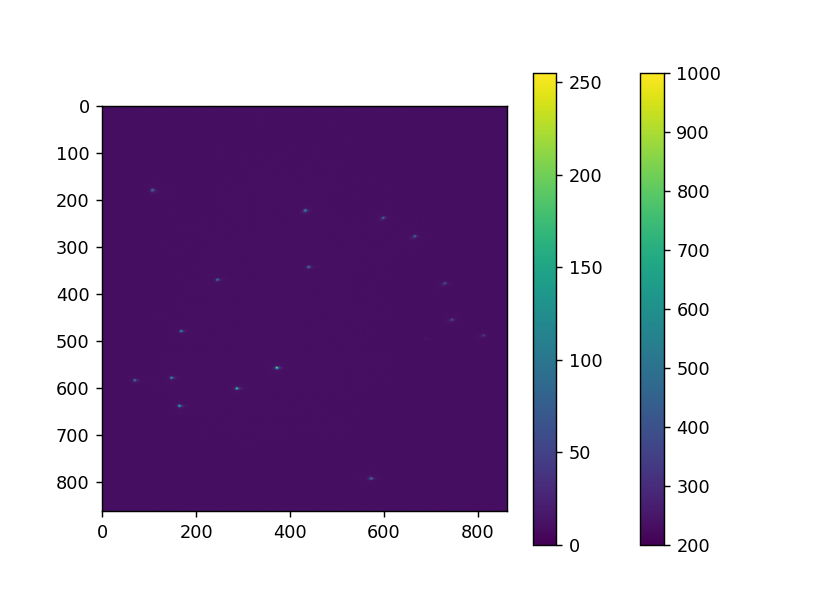

In [95]:
plt.imshow(im1Reg)